### Data Analytics, Machine Learning (Logistic Regression, SVM)

### 1. Description of the problem

The dataset used here taken from the UCI Machine Learning Repository, http://archive.ics.uci.edu/ml/datasets/, 
which describes different species of mushrooms from the genera Agaricus and Lepiota. The data are taken from The Audubon Society Field Guide to North American Mushrooms.

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family.  Each species is identified as "edible" and "poisonous". 

A supervised machine learning model is built to identify whether a mushroom is edible or poisonous. In order to achieve this objective, the model needs to trained by training data so that it can categorize the mushrooms as edible or poisonus by using testing data. Another objective is to determine how accurate this model can determine the edibility of a mushroom.

The dataset has 8123 instances (rows), 23 attributes (features) including 1 class.



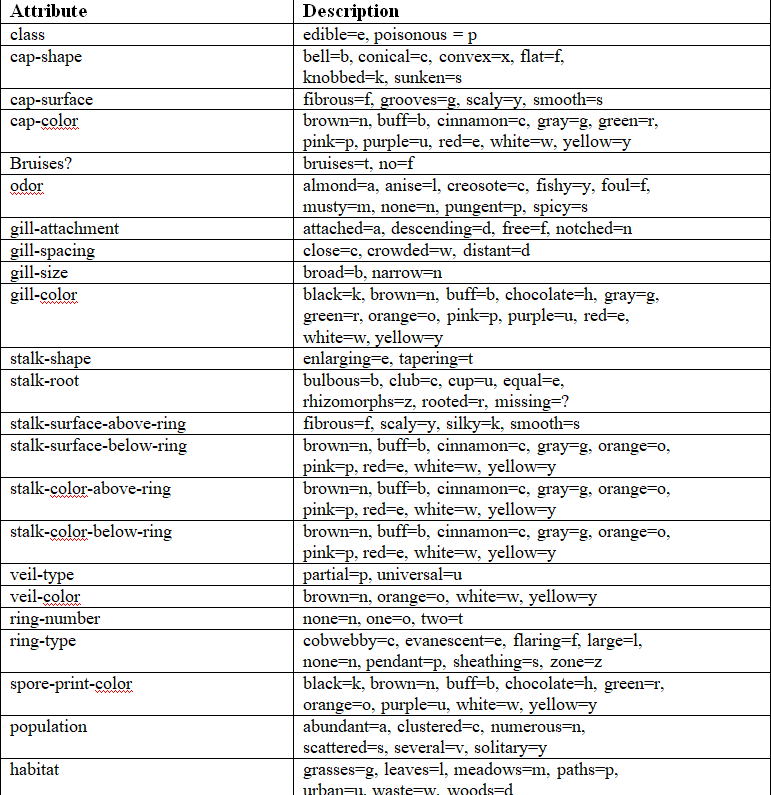

The dataset used contains non-numerical data and it will need an additional step while encoding the categorical data to numerical data.

In [80]:
import time
import pandas as pd
import numpy as np

import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score


###### Loading data

In [3]:
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', error_bad_lines=False)

In [4]:
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


###### It shows that the number of rows are 8123 and attributes are 23.  

In [6]:
df.shape

(8123, 23)

Each row represents a single mushroom. The first column is the target variable containing the class labels, identifying whether the mushroom is "poisonous (p)" or "edible (e)". The remaining columns are 22 discrete features that describe the mushroom in some observable way; their values are encoded by characters. 

###### It shows that among 8123 rows, 4208 rows are edible and 3915 rows are poisonous.  

In [10]:
df['p'].value_counts()

e    4208
p    3915
Name: p, dtype: int64

e    4208
p    3915
Name: class, dtype: int64


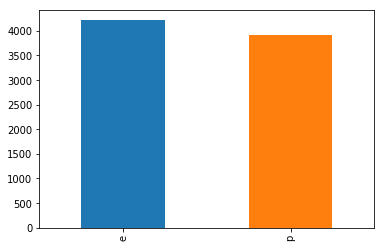

In [40]:
#show plots in notebook
%matplotlib inline

#bar chart of classes using pandas plotting
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='bar')

###### As the column labels are not updated in the dataset, it needs to be updated for better understanding.

In [14]:
column_labels = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
             'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
             'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
             'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']

df.columns = column_labels

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
class                     8123 non-null object
cap-shape                 8123 non-null object
cap-surface               8123 non-null object
cap-color                 8123 non-null object
bruises                   8123 non-null object
odor                      8123 non-null object
gill-attachment           8123 non-null object
gill-spacing              8123 non-null object
gill-size                 8123 non-null object
gill-color                8123 non-null object
stalk-shape               8123 non-null object
stalk-root                8123 non-null object
stalk-surf-above-ring     8123 non-null object
stalk-surf-below-ring     8123 non-null object
stalk-color-above-ring    8123 non-null object
stalk-color-below-ring    8123 non-null object
veil-type                 8123 non-null object
veil-color                8123 non-null object
ring-number               8123 non-null object


In [133]:
for col in df.columns.values:
    print(col, df[col].unique())

class ['e' 'p']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['c' 'e' 'b' 'r' '?']
stalk-surf-above-ring ['s' 'f' 'k' 'y']
stalk-surf-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-color ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['n' 's' 'a' 'v' 'y' 'c']
habitat ['g' 'm' 'u' 'd' 'p' 'w' 'l']


###### The data description indicates that the feature "stalk-root" has some missing values, denoted by "?". There are 2480 missing attribute values in the dataset and all of them denoted by "?" for the attribute stalk-root.

In [37]:
df_null=df[df['stalk-root'] == '?']

In [38]:
df_null.shape

(2480, 23)

# 2. Construction and Tuning the Classifier

The next step is building and training the actual classifier, which can accurately classify the data. 
With this it will be able to show which type of mushroom in the dataset belongs to, based on the features.
For this task, it is required to split the dataset into a training set and a test set. 
With the training set classifier will be trained, and with the test set the accuracy of the classifier will be validated. 

Usually a 70 % / 30 % ratio is used when splitting into training and test set, but this ratio should be chosen based on the size
of the dataset. For example, if the dataset does not have enough entries, 30% of it might not contain all of the classes or 
enough information to properly function as a validation set.


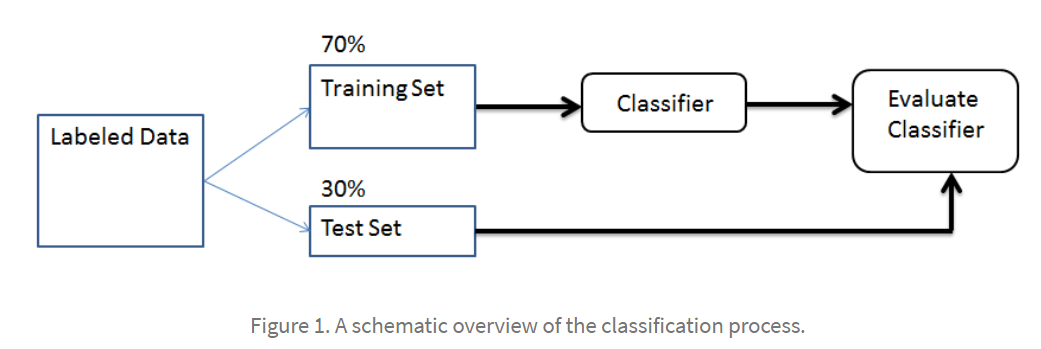

In [43]:
#  This method transforms a dataframe into a train and test set, for this you need to specify:
#1. the ratio train : test (usually 0.7)
#2. the column with the Y_values

def get_train_test(df, y_col, x_cols, ratio):
 
    mask = np.random.rand(len(df)) < ratio
    df_train = df[mask]
    df_test = df[~mask]
       
    Y_train = df_train[y_col].values
    Y_test = df_test[y_col].values
    X_train = df_train[x_cols].values
    X_test = df_test[x_cols].values
    return df_train, df_test, X_train, Y_train, X_test, Y_test

In [75]:
dict_classifiers = {
    
    "Linear Support Vector Machine SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    
}

Then there will be iteration over this dictionary, and for each classifier:

1. train the classifier with .fit(X_train, Y_train)
2. evaluate how the classifier performs on the training set with .score(X_train, Y_train)
3. evaluate how the classifier perform on the test set with .score(X_test, Y_test).
4. keep track of how much time it takes to train the classifier with the time module.
5. save the trained model, the training score, the test score, and the training time into a dictionary. If necessary this dictionary can be saved with Python’s pickle module.

This method, takes as input the X, Y matrices of the Train and Test set. Then it fits them on two Classifiers specified in the dict_classifiers.
The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary is because it is very easy to save the whole dictionary with the pickle module.

In [70]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 2, verbose = True):
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models


#### 2.1 Data Preprocessing


In [47]:
for col in df.columns.values:
    print(col, df[col].unique())

class ['e' 'p']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['c' 'e' 'b' 'r' '?']
stalk-surf-above-ring ['s' 'f' 'k' 'y']
stalk-surf-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-color ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['n' 's' 'a' 'v' 'y' 'c']
habitat ['g' 'm' 'u' 'd' 'p' 'w' 'l']


##### 2.1.1 Remove columns with only 1 value

It shows that a single column, "veil_type", has only one value which cannot effect the outcome of the model. So it can be dropped.

In [48]:
for col in df.columns.values:
    if len(df[col].unique()) <= 1:
        print("Removing column {}, which only contains the value: {}".format(col, df[col].unique()[0]))

Removing column veil-type, which only contains the value: p


##### 2.1.2 Imputing missing values

Some datasets contain missing values containing '?'.

It is required to decide what to do with these missing values. What is most effective, really depends on the type of data, the type of missing data and the ratio between missing data and non-missing data.

1. If the number of rows containing missing data is only a few percent of the total dataset, the best option could be to drop those rows.

2. If there is a column which contains almost all missing data, it will not have much added value and it might be best to drop that column.

3. It could be that a value not being filled in also is information which helps with the classification and it is best to leave it like it is.

4. The missing values can be filled with zero, forward fill or backward fill


##### 2.1.2.1 Drop rows with missing values

In [49]:
print("Number of rows in total: {}".format(df.shape[0]))
print("Number of rows with missing values in column 'stalk-root': {}".format(df[df['stalk-root'] == '?'].shape[0]))
df_dropped_rows = df[df['stalk-root'] != '?']

Number of rows in total: 8123
Number of rows with missing values in column 'stalk-root': 2480


##### 2.1.2.2 Drop column with more than a specific percent of missing values

In [ ]:
df

In [51]:
drop_percentage = 0.8

df_dropped_cols = df.copy(deep=True)
df_dropped_cols.loc[df_dropped_cols['stalk-root'] == '?', 'stalk-root'] = np.nan

for col in df_dropped_cols.columns.values:
    no_rows = df_dropped_cols[col].isnull().sum()
    percentage = no_rows / df_dropped_cols.shape[0]
    if percentage > drop_percentage:
        del ds_dropped_cols[col]
        print("Column {} contains {} missing values. This is {} percent. Dropping this column.".format(col, no_rows, percentage))

##### 2.1.2.3 Fill missing values with zero OR -1

In [55]:
df_zerofill = df.copy(deep = True)
df_zerofill.loc[df_zerofill['stalk-root'] == '?', 'stalk-root'] = np.nan
df_zerofill.fillna(0, inplace=True)

##### 2.1.2.4 Fill missing values with backward fill

In [56]:
df_bfill = df.copy(deep = True)
df_bfill.loc[df_bfill['stalk-root'] == '?', 'stalk-root'] = np.nan
df_bfill.fillna(method='bfill', inplace=True)

##### 2.1.2.5 Fill missing values with forward fill

In [58]:
df_ffill = df.copy(deep = True)
df_ffill.loc[df_ffill['stalk-root'] == '?', 'stalk-root'] = np.nan
df_ffill.fillna(method='ffill', inplace=True)

#### 2.2 Handling columns with categorical data

When there are columns with categorical data, we can do two perform the below steps.

1) One-hot encode the columns such that they are converted to numerical values.

2) Expand the column into N different columns containing binary values.



In [ ]:
def label_encode(df, list_columns):
    """
    This method one-hot encodes all column, specified in list_columns
    
    """
    for col in list_columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)

        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed      

def expand_columns(df, list_columns):
    for col in list_columns:
        colvalues = df[col].unique()
        for colvalue in colvalues:
            newcol_name = "{}_is_{}".format(col, colvalue)
            df.loc[df[col] == colvalue, newcol_name] = 1
            df.loc[df[col] != colvalue, newcol_name] = 0
    df.drop(list_columns, inplace=True, axis=1)

##### 2.2.1 One-Hot encoding the columns with categorical data

In [60]:
#This method one-hot encodes all column, specified in list_columns
def label_encode(df, list_columns):
    
    for col in list_columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)

        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed  

In [63]:
df_ohe = df.copy(deep=True)
to_be_encoded_cols = df_ohe.columns.values
label_encode(df_ohe, to_be_encoded_cols)
df_dropped_rows_ohe = df_dropped_rows.copy(deep = True)
df_zerofill_ohe = df_zerofill.copy(deep = True)
df_bfill_ohe = df_bfill.copy(deep = True)
df_ffill_ohe = df_ffill.copy(deep = True)

label_encode(df_dropped_rows_ohe, to_be_encoded_cols)
label_encode(df_zerofill_ohe, to_be_encoded_cols)
label_encode(df_bfill_ohe, to_be_encoded_cols)
label_encode(df_ffill_ohe, to_be_encoded_cols)
display(df_ohe.head())

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surf-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


##### 2.2.2 Expanding the columns with categorical data

In [65]:
def expand_columns(df, list_columns):
    for col in list_columns:
        colvalues = df[col].unique()
        for colvalue in colvalues:
            newcol_name = "{}_is_{}".format(col, colvalue)
            df.loc[df[col] == colvalue, newcol_name] = 1
            df.loc[df[col] != colvalue, newcol_name] = 0
    df.drop(list_columns, inplace=True, axis=1)

In [67]:
y_col = 'class'
to_be_expanded_cols = list(df.columns.values)
to_be_expanded_cols.remove(y_col)

df_expanded = df.copy(deep=True)
label_encode(df_expanded, [y_col])
expand_columns(df_expanded, to_be_expanded_cols)
df_dropped_rows_expanded = df_dropped_rows.copy(deep = True)
df_zerofill_expanded = df_zerofill.copy(deep = True)
df_bfill_expanded = df_bfill.copy(deep = True)
df_ffill_expanded = df_ffill.copy(deep = True)

label_encode(df_dropped_rows_expanded, [y_col])
label_encode(df_zerofill_expanded, [y_col])
label_encode(df_bfill_expanded, [y_col])
label_encode(df_ffill_expanded, [y_col])

expand_columns(df_dropped_rows_expanded, to_be_expanded_cols)
expand_columns(df_zerofill_expanded, to_be_expanded_cols)
expand_columns(df_bfill_expanded, to_be_expanded_cols)
expand_columns(df_ffill_expanded, to_be_expanded_cols)
display(df_expanded.head())

,class,cap-shape_is_x,cap-shape_is_b,cap-shape_is_s,cap-shape_is_f,cap-shape_is_k,cap-shape_is_c,cap-surface_is_s,cap-surface_is_y,cap-surface_is_f,...,population_is_v,population_is_y,population_is_c,habitat_is_g,habitat_is_m,habitat_is_u,habitat_is_d,habitat_is_p,habitat_is_w,habitat_is_l
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.3 Classifying the dataset

It was identified that there are two different ways to handle columns with categorical data, and many different ways to handle missing values. All of these ways on all of the classifiers present in the scikit-learn are explained and applied here.


In [73]:
dict_dataframes = {
    "df_ohe": df_ohe,
    "df_dropped_rows_ohe": df_dropped_rows_ohe,
    "df_zerofill_ohe": df_zerofill_ohe,
    "df_bfill_ohe": df_bfill_ohe,
    "df_ffill_ohe": df_ffill_ohe,
    "df_expanded": df_expanded,
    "df_dropped_rows_expanded": df_dropped_rows_expanded,
    "df_zerofill_expanded": df_zerofill_expanded,
    "df_bfill_expanded": df_bfill_expanded,
    "df_ffill_expanded": df_ffill_expanded
}

def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))


#### 2.3.1 Training and Testing the model and Result

The dataset is splitted into a 70% training set and a 30% test set and start training and validating a batch of the 2 classifiers.




#### Training and Test result

In [92]:
y_col = 'class'
train_test_ratio = 0.7

for df_key, df in dict_dataframes.items():
    x_cols = list(df.columns.values)
    x_cols.remove(y_col)
    df_train, df_test, X_train, Y_train, X_test, Y_test = get_train_test(df, y_col, x_cols, train_test_ratio)
    dict_models = batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 2, verbose=False)
    
    print()
    print(df_key)
    display_dict_models(dict_models)
    print("-------------------------------------------------------")


df_ohe


,classifier,train_score,test_score,train_time
0,Linear Support Vector Machine SVM,1.00000,1.000000,0.314182
1,Logistic Regression,0.94979,0.953054,0.053294


-------------------------------------------------------

df_dropped_rows_ohe


,classifier,train_score,test_score,train_time
0,Linear Support Vector Machine SVM,1.000000,1.000000,0.159935
1,Logistic Regression,0.958721,0.958683,0.036535


-------------------------------------------------------

df_zerofill_ohe


,classifier,train_score,test_score,train_time
0,Linear Support Vector Machine SVM,1.0000,1.000000,0.341914
1,Logistic Regression,0.9467,0.955637,0.058288


-------------------------------------------------------

df_bfill_ohe


,classifier,train_score,test_score,train_time
0,Linear Support Vector Machine SVM,1.000000,1.000000,0.383361
1,Logistic Regression,0.949177,0.951939,0.147829


-------------------------------------------------------

df_ffill_ohe


,classifier,train_score,test_score,train_time
0,Linear Support Vector Machine SVM,1.000000,1.000000,0.318955
1,Logistic Regression,0.950341,0.950491,0.051803


-------------------------------------------------------

df_expanded


,classifier,train_score,test_score,train_time
1,Logistic Regression,1.000000,1.00000,0.044406
0,Linear Support Vector Machine SVM,0.997175,0.99756,0.765230


-------------------------------------------------------

df_dropped_rows_expanded


,classifier,train_score,test_score,train_time
1,Logistic Regression,1.000000,1.000000,0.028504
0,Linear Support Vector Machine SVM,0.998472,0.998834,0.319549


-------------------------------------------------------

df_zerofill_expanded


,classifier,train_score,test_score,train_time
1,Logistic Regression,1.000000,1.000000,0.072047
0,Linear Support Vector Machine SVM,0.997536,0.997952,0.714566


-------------------------------------------------------

df_bfill_expanded


,classifier,train_score,test_score,train_time
1,Logistic Regression,0.999824,0.998776,0.053666
0,Linear Support Vector Machine SVM,0.998414,0.997143,0.709197


-------------------------------------------------------

df_ffill_expanded


,classifier,train_score,test_score,train_time
1,Logistic Regression,1.000000,1.000000,0.038387
0,Linear Support Vector Machine SVM,0.999105,0.998818,0.718124


-------------------------------------------------------


### Discussion



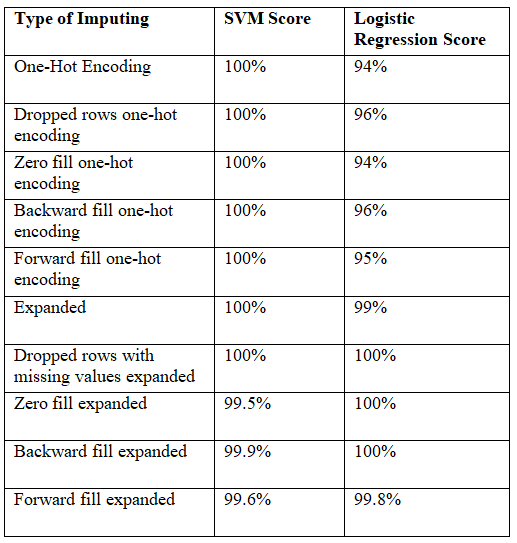

The result shows that most of the cases, SVM perfomrs better than Logistic Regression. Out of 10 cases, Logistic Regression perfomrs better than SVM in 4 cases only. Based on the result only, we can not say that SVM performs better than Logistic Regression. SVM performs better than Logistic Regression in this example based on the datasets chosen.

### Fine tuning the classifier 

Instead of using the same data to tune the hyperparameter and evaluate model performance, nested cross-validation, GridSearch, is adopted to avoid risking optimistically biasing the model. 

One downside to using nested cross-validation is how computationally intensive it can be. The outer loop splits the data into training/test folds using 10-fold cross-validation and reports model performance, while the inner loop performs a grid search on each training fold of the outer loop to tune the hyperparameter with 10-fold cross-validation. In addition, each grid search tests 10 hyperparameter values. That means 1000 models can be trained which is time consuming. Thus n_jobs=-1 parameter is used in order to parallelizes the operations across all CPU cores and speeds up the computation considerably.

20% data is used for testing.  

##### Linear Support Vector Machine (SVM)

In [89]:
param_grid = [{'C': np.logspace(-3, 3, 10)}]

grid_search_SVC = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores_SVC = cross_val_score(
    estimator=grid_search_SVC,
    X=X_test,
    y=Y_test,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)

In [90]:
scores_SVC.mean()*100

100.0

##### Logistic Regression

In [83]:
param_grid = [{'C': np.logspace(-3, 3, 10)}]

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores = cross_val_score(
    estimator=grid_search,
    X=X_test,
    y=Y_test,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)

In [86]:
scores.mean()*100

99.9370188326903

After tuning the classifier, the performance of the models have not been increased. The both algorithms, SVM and Logistic Regression, produce the similar score. As the models performed very well, the fine tuning does not affect the performance in this example. 